### J014
### Ankita Dasgupta
### ML Assginment 9: Decision Tree with Cross Validation and GridSearchCV

In [1]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

D:\College\Semester 5\Subjects\Machine Learning


In [2]:
cars = pd.read_csv('Data\car_evaluation.csv', header = None)
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
cars.columns = col_names
cars.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
for i in col_names:
    print("Column: ",i)
    print(cars[i].value_counts())
    print("\n")

Column:  buying
vhigh    432
low      432
med      432
high     432
Name: buying, dtype: int64


Column:  maint
vhigh    432
low      432
med      432
high     432
Name: maint, dtype: int64


Column:  doors
5more    432
2        432
3        432
4        432
Name: doors, dtype: int64


Column:  persons
2       576
4       576
more    576
Name: persons, dtype: int64


Column:  lug_boot
small    576
big      576
med      576
Name: lug_boot, dtype: int64


Column:  safety
low     576
med     576
high    576
Name: safety, dtype: int64


Column:  class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64




In [6]:
cars.shape

(1728, 7)

In [7]:
X = cars.drop(['class'],axis = 1)
y = cars['class']

### Splitting Data into Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform((X_test))

In [9]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [10]:
y_pred = clf_gini.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

print(f'Model with gini index gives an accuracy of: {accuracy_score(y_test, y_pred)}')

Model with gini index gives an accuracy of: 0.9393063583815029


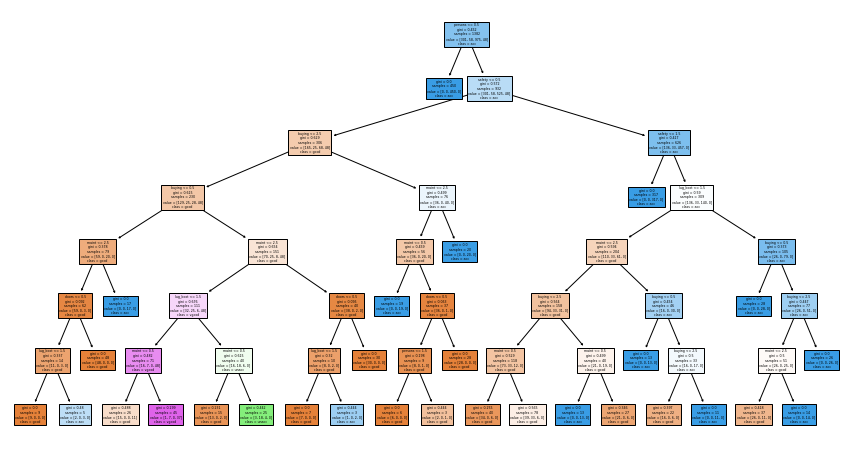

In [12]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf_gini,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [13]:
# Check for underfitting/overfitting
print(f'Training set score: {clf_gini.score(X_train,y_train)}')
print(f'Test set score: {clf_gini.score(X_test,y_test)}')

Training set score: 0.9276410998552822
Test set score: 0.9393063583815029


### Entropy

In [14]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 7, random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [15]:
y_pred = clf_entropy.predict(X_test)

In [16]:
print(f'Model with gini index gives an accuracy of: {accuracy_score(y_test, y_pred)}')

Model with gini index gives an accuracy of: 0.9421965317919075


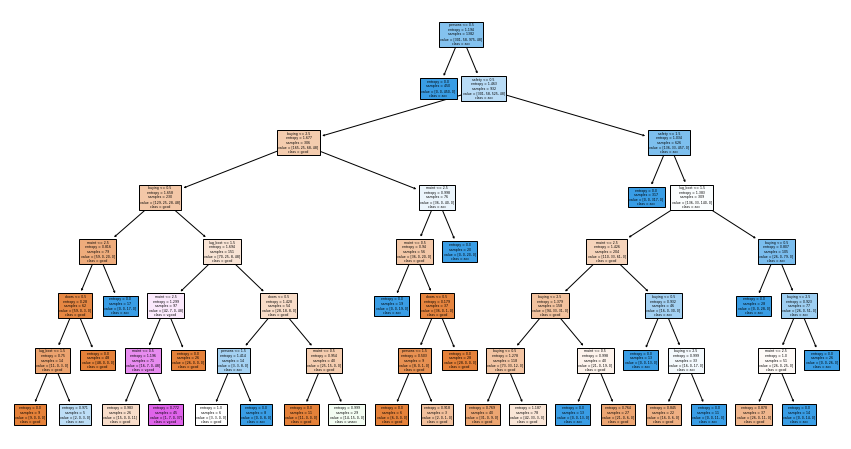

In [17]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf_entropy,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [18]:
# Check for underfitting/overfitting

print(f'Training set score: {clf_entropy.score(X_train,y_train)}')
print(f'Test set score: {clf_entropy.score(X_test,y_test)}')

Training set score: 0.9225759768451519
Test set score: 0.9421965317919075


In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test, y_pred))

[[ 76   4   1   2]
 [  6   3   0   2]
 [  3   0 232   0]
 [  2   0   0  15]]


              precision    recall  f1-score   support

         acc       0.87      0.92      0.89        83
        good       0.43      0.27      0.33        11
       unacc       1.00      0.99      0.99       235
       vgood       0.79      0.88      0.83        17

    accuracy                           0.94       346
   macro avg       0.77      0.76      0.76       346
weighted avg       0.94      0.94      0.94       346



### Cross - Validation

In [20]:
scores1 = cross_val_score(clf_gini, X_train, y_train, cv=20, scoring='accuracy') #cv is cross validation
print("All scores: ",scores1)
print("Mean of Scores: ",scores1.mean())

All scores:  [0.95714286 0.91428571 0.91304348 0.91304348 0.94202899 0.91304348
 0.92753623 0.94202899 0.94202899 0.89855072 0.94202899 0.92753623
 0.95652174 0.91304348 0.95652174 0.88405797 0.92753623 0.91304348
 0.91304348 0.85507246]
Mean of Scores:  0.9225569358178056


In [21]:
scores2 = cross_val_score(clf_entropy, X_train, y_train, cv=20, scoring='accuracy') #cv is cross validation
print("All scores: ",scores2)
print("Mean of Scores: ",scores2.mean())

All scores:  [0.92857143 0.9        0.86956522 0.91304348 0.94202899 0.91304348
 0.91304348 0.92753623 0.91304348 0.89855072 0.92753623 0.92753623
 0.95652174 0.88405797 0.92753623 0.86956522 0.92753623 0.91304348
 0.91304348 0.91304348]
Mean of Scores:  0.9138923395445137


Gini Classifier performs better than Entropy Classifier for our dataset

In [31]:
# CV on Gini

len_range=list(range(1,50))
acc_score=[]
for l in len_range:
    clf = DecisionTreeClassifier(criterion='gini',max_depth = l)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    print(l,":",scores.mean())
#print(acc_score)  

1 : 0.7054999478677928
2 : 0.7756646856427901
3 : 0.7583046606193306
4 : 0.8190699614221666
5 : 0.8647117088937545
6 : 0.8654259201334584
7 : 0.9211396100510895
8 : 0.9269210718381817
9 : 0.9508080492128037
10 : 0.9659941611927849
11 : 0.9688874986966949
12 : 0.9703315608382859
13 : 0.9717860494213324
14 : 0.9688822854759671
15 : 0.967438223334376
16 : 0.9681576477948075
17 : 0.9688822854759671
18 : 0.9688874986966948
19 : 0.9725054738817642
20 : 0.9703367740590136
21 : 0.9681628610155354
22 : 0.9717860494213324
23 : 0.9732353247836512
24 : 0.9710561985194452
25 : 0.9725159003232197
26 : 0.9696121363778543
27 : 0.9717912626420603
28 : 0.9725106871024918
29 : 0.9732301115629236
30 : 0.9688822854759671
31 : 0.9703315608382859
32 : 0.9710561985194452
33 : 0.9703315608382859
34 : 0.9674434365551037
35 : 0.9681680742362632
36 : 0.9746846001459704
37 : 0.971061411740173
38 : 0.9717860494213324
39 : 0.9688822854759671
40 : 0.972510687102492
41 : 0.9674434365551038
42 : 0.9710561985194455
43 :

Text(0, 0.5, 'Cross-Validated Accuracy')

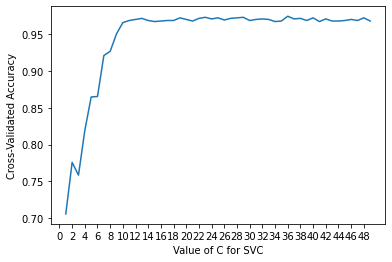

In [32]:
C_values=list(range(1,50))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,50,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

max_depth = 32 gives best accuracy for gini

In [33]:
# CV on Entropy

len_range=list(range(1,50))
acc_score=[]
for l in len_range:
    clf = DecisionTreeClassifier(criterion='entropy',max_depth = l)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    print(l,":",scores.mean())

1 : 0.7054999478677928
2 : 0.7756646856427901
3 : 0.7583046606193306
4 : 0.8190699614221666
5 : 0.856740694401001
6 : 0.8697633197789594
7 : 0.9168022104055884
8 : 0.9370607861536857
9 : 0.9515274736732353
10 : 0.9681837138984465
11 : 0.9768585131894485
12 : 0.9754040246064019
13 : 0.9782973621103117
14 : 0.97757793764988
15 : 0.976848086747993
16 : 0.9746793869252425
17 : 0.9782973621103117
18 : 0.979027213012199
19 : 0.9761234490668336
20 : 0.9783025753310396
21 : 0.9761286622875612
22 : 0.9775727244291523
23 : 0.9761286622875612
24 : 0.9753988113856741
25 : 0.9775727244291523
26 : 0.9746793869252425
27 : 0.9775727244291523
28 : 0.976848086747993
29 : 0.9746793869252424
30 : 0.9775727244291523
31 : 0.9783025753310396
32 : 0.9768532999687206
33 : 0.9783025753310396
34 : 0.9761338755082891
35 : 0.9783077885517674
36 : 0.976848086747993
37 : 0.97757793764988
38 : 0.979027213012199
39 : 0.9782973621103117
40 : 0.9732301115629236
41 : 0.9746846001459701
42 : 0.9761234490668336
43 : 0.9761

Text(0, 0.5, 'Cross-Validated Accuracy')

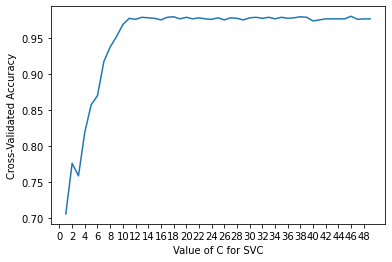

In [34]:
C_values=list(range(1,50))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,50,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

max_depth = 44 gives best accuracy for entropy

### Grid Search

In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [39]:
clf.fit(X_train, y_train)
print(clf.best_score_)

0.9811960445769895


In [41]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 40}


In [43]:
y_pred= clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9682080924855492
